**Projeto:** Classificação de pacientes propensos a desenvolverem doenças cardíacas.

**Etapa:** Preprocessamento

**Autor:** Dante Dantas

**Objetivo:** Realizar a limpeza dos dados ruídosos e discrepantes.

# **Principais Insights**

*Descrever aqui os principais insights*

#**Importação de pacotes**

##**Modelagem**

In [ ]:
import pandas as pd
import numpy as np
import pickle

##**Seleção e Metricas**

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import RandomForestClassifier

##**Dataviz**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**Importação dos dados**

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Projetos/Saúde/[Classificação] Doença Cardíacas/Dados/1.RAW/proj_raw_tb_heart_disease.csv', sep=',', encoding='utf-8')

#**Limpeza dos dados**

##**Tipos dos atributos**

###**Code:**

In [ ]:
base.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


###**Insights:**

##**Dados Nulos**

###**Code:**

In [ ]:
base.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


###**Insights:**

Não apresenta valores nulos

##**Dados Ruídosos**

###**Notes:** RestingBP

Durante a exploração notamos casos de pressão sanguinia em repouso com valores zerados. Avaliamos que não faz sentido, e aqui iremos removê-los

⚠️ Investigar casos onde a pressão é de 80, 180 e 200. Avaliar se faz sentido e tratar na limpeza dos dados (PENDENTE)

###**Code:** RestingBP

In [ ]:
base.shape

(918, 12)

In [ ]:
#Tratamento RestingBP
df = base.loc[base.RestingBP != 0]

In [ ]:
df.shape

(917, 12)

###**Notes:** Cholesterol

⚠️ 172 registros de colesterol zerado - Isso não faz sentido. Precisa tratar;

Avaliar se o colesterol acima de 407 fazem sentido, como por exemplo o 613.

###**Code:** Cholesterol

In [ ]:
df['Cholesterol'].median()

223.0

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,171
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


In [ ]:
df['Cholesterol'].replace(0, np.NaN, inplace=True)

<ipython-input-10-57824da23651>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].replace(0, np.NaN, inplace=True)
<ipython-input-10-57824da23651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'].replace(0, np.NaN, inplace=True)


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df['Cholesterol'].median()

237.0

In [ ]:
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

<ipython-input-12-6116bc1e7a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)


In [ ]:
df['Cholesterol'].median()

237.0

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


⚠️ Avaliar se o colesterol acima de 407 fazem sentido, como por exemplo o 603.

In [ ]:
df.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,237.0,0,Normal,150,N,0.0,Flat,1


<Axes: xlabel='Cholesterol', ylabel='Count'>

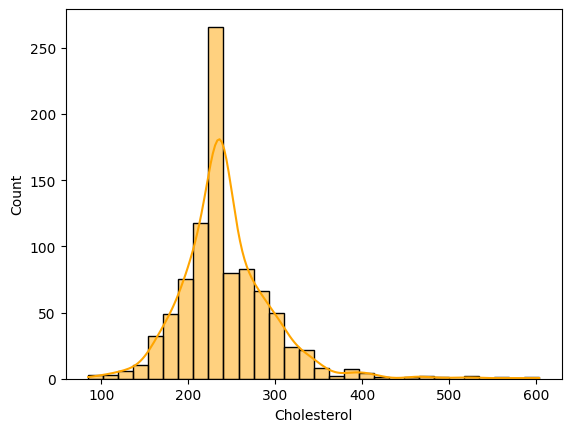

In [ ]:
sns.histplot(df, x='Cholesterol', bins=30, color='Orange', kde=True, stat="count")

#**Analise de Outliers**

##**Idades**

###**Insights**
- As idades apresentam uma distribuição normal;
- Tem um intervalor interquartil de 28 a 77 anos;
- A mediana das idades é de 54 anos;
- 25% das pessoas possuem até 47 anos;
- 75% das pessoas até 60 anos;
- **Sem presença de outliers**

###**Code:**

In [ ]:
px.box(df, y='Age')

<Axes: xlabel='Age', ylabel='Count'>

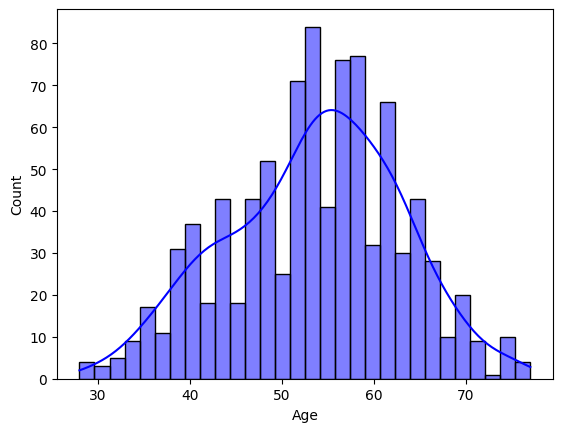

In [ ]:
sns.histplot(base, x='Age', bins=30, color="blue", kde=True, stat="count")

In [ ]:
fig_age = px.box(base, y="Age", title="Distribuição das idades")
fig_age.show()

<Axes: title={'center': 'Distribuição por idade e genêro'}, xlabel='Age', ylabel='count'>

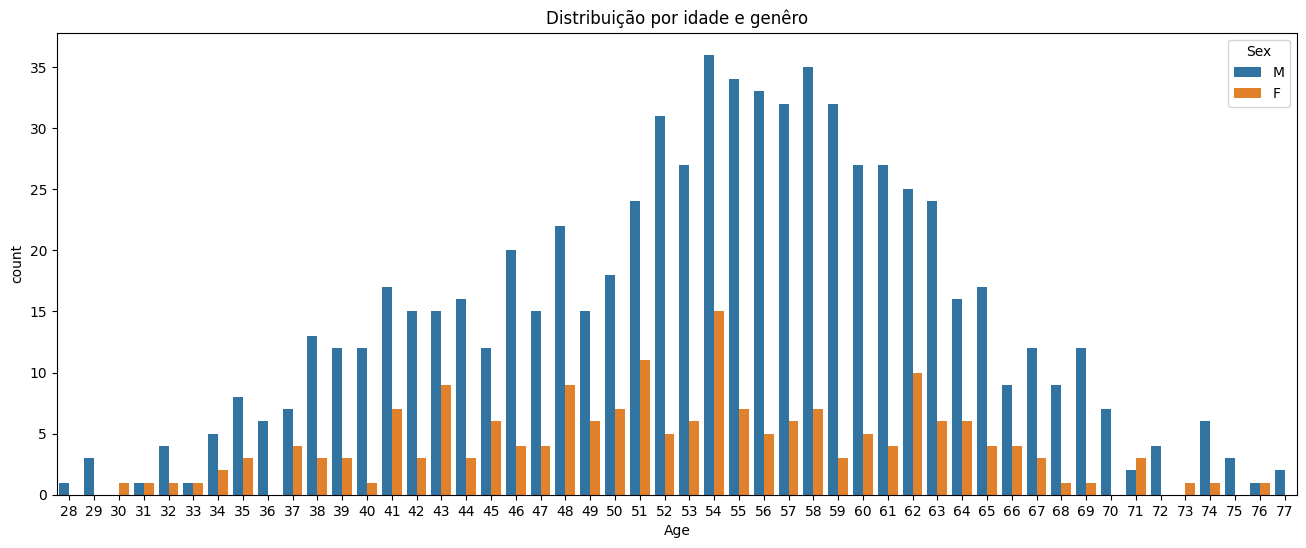

In [ ]:
plt.figure(figsize = (16,6))
plt.title('Distribuição por idade e genêro')
sns.countplot(data=base, x='Age', hue='Sex')

##**Resting BP**: Pressão sanguínea em repouso (mmHg)

###**Insights**

Investigar casos onde a pressão é de 80, 180 e 200.
Avaliar se faz sentido e tratar na limpeza dos dados.
- Provavelmente é ruído, causado por erro de digitação

**Tem presença de Outliers**
Os outliers fazem sentido, dado que para ter uma doença cardiaca o aumento da pressão arterial em repouso é um indicador, podendo a pressão chegar a 200/100mmHg em casos de emergências por exemplo.

###**Code**

In [ ]:
px.box(df, y='RestingBP')

In [ ]:
eda_outlier_bp = df.loc[base.RestingBP > 171]

In [ ]:
eda_outlier_bp

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241.0,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393.0,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285.0,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280.0,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198.0,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295.0,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213.0,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347.0,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,237.0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,237.0,0,Normal,98,Y,0.0,Up,1


## **Cholesterol:**



###**Insights**

Avaliar se o colesterol acima de 407 fazem sentido, como por exemplo o 613.

**Presença de outliers**

Colesterol acima de 240 não é incomum. Cerca de 12% da população americana possuiam colesterol nesse nível entre 2015 e 2018.

Alguns individuos podem apresentar colesterol acima de 500, no entanto casos que possuem colesterol acima de 600 é uma condição rara e uma patologia de cunho genetico, diagnosticada como Hipercolesterolemia Familiar Homozigótica. No entanto, a prevalencia dessa doença no mundo é de 1 a 9 casos por 1 milhão de pessoas (o equivalente a dizer que de toda a população mundial de 8bi, cerca de 8000 pessoas podem desenvolver esse quadro) por conta disso iremos retirar esse registro da nossa base.

Estimativa de prevalência de acordo com a orphanet

###**Code**

In [ ]:
px.box(df, y='Cholesterol')

In [ ]:
fig_cholesterol = px.box(base, y='Cholesterol', title='Dist.Cholesterol')
fig_cholesterol.show()

In [ ]:
df_eda_cholesterol = df.loc[df['Cholesterol'] > 599]
df_eda_cholesterol


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
149,54,M,ASY,130,603.0,1,Normal,125,Y,1.0,Flat,1


In [ ]:
#Tratamento Choslesterol

df = df.loc[df.Cholesterol != 603]

In [ ]:
fig_cholesterol = px.box(df, y='Cholesterol', title='Dist.Cholesterol')
fig_cholesterol.show()

## **MaxHR:**



Max HR: Frequência cardíaca máxima.

É a maior frequência cardíaca que um indivíduo pode atingir durante o esforço.

Para calcular a FCmax, pode-se usar a fórmula (220 - idade) para homens e (226 - idade) para mulheres.

O coração tem dois movimentos: a diástole (quando o órgão se enche de sangue) e a sístole (quando o sangue é bombeado para o corpo). Quando o coração acelera, ele encurta a diástole.

Aqui o MaxHR é expresso em batimentos por minuto (bpm)

Quando os BPMs estão fora dos índices regulares, dizemos que a pessoa tem uma arritmia cardíaca

Para atletas um valor de até 188 bpm é normal e considerado saudáveo, aponta estudo realizado por pesquisadores brasileiros e publicado esta semana no periódico científico “International Journal of Cardiology”.

Mas em repouso é importante observar casos acima de 120bpm

###**Insights**

Os outliers abaixos dos valores minimos bem como valores máximos fazem sentido.

###**Code**

In [ ]:
px.box(df, y='MaxHR')

In [ ]:
eda_maxhr = df.loc[df.MaxHR == 60]

In [ ]:
eda_maxhr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,M,ASY,140,237.0,0,Normal,60,N,0.0,Flat,1


##**Oldpeak**

Depressão de ST induzida por exercício em relação ao repouso.

A depressão do segmento ST é uma alteração que pode indicar problemas cardiovasculares. A depressão é considerada significativa quando a diferença é maior ou igual a 1 mm

###**Insights**

- Vimos que em 40% dos casos a depressão do segmento ST é nula - igual a linha de base;

- 50% dos casos é abaixo de 0.6m, portanto normal.
- 75% dos casos tem até 1.5mm, que apresenta uma diferança que vale a pena considerar.
- 25% apresentaram valores acima de 1.5mm, chegando até 3.7 de limite máximo, com alguns outliers de 6.2mm

**Contém Outliers**

###**Code**

In [ ]:
fig_oldpeak = px.box(df, y='Oldpeak', title='Boxplot Oldpeak')
fig_oldpeak.show()

In [ ]:
eda_oldpeak = df.loc[df.Oldpeak > 4]
eda_oldpeak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231.0,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270.0,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217.0,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298.0,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164.0,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318.0,0,ST,140,N,4.4,Down,1


Investiguei um caso onde o registro aponta para um quadro clinico de doença cardíaca, mas o rótulo da variável alvo sinaliza que não é.

Contudo, os dados apontam para um cenário altamente provável quando examinamos os números a seguir:
- Paciente do sexo masculino de 59 anos;
- com quadro de angina típica;
- pressão sistólica de 178mmHg;
- colesterol 270;
- apresentou hipertrofia ventricular esquerda;
- depressão ST de 4.2,
- Alteração no segmento ST abaixo da linha de base

- Aqui a alteração do segmento ST deve ser elevada ou o dados do eletrocardiograma deveria apontar para uma depressão negativa de -4.2, de todo modo o conjunto dos registros apontam para um paciente com doença cardiovascular, especificamente uma DAC (doença arterial coronariana).

Por conta disso esse registro também será removido.

In [ ]:
filter_conditions = (
    (df['Age'] == 59) &
    (df['Sex'] == 'M') &
    (df['ChestPainType'] == 'TA') &
    (df['RestingBP'] == 178) &
    (df['Cholesterol'] == 270.0) &
    (df['FastingBS'] == 0) &
    (df['RestingECG'] == 'LVH') &
    (df['MaxHR'] == 145) &
    (df['ExerciseAngina'] == 'N') &
    (df['Oldpeak'] == 4.2) &
    (df['ST_Slope'] == 'Down')
)

In [ ]:
df = df[~filter_conditions]

In [ ]:
df.shape

(915, 12)

**#Exportação**

In [ ]:
df.to_csv("tb_trusted_heart_disase.csv", sep=',', encoding='utf-8', index=False)

#Etapas

Próximas etapas:

7.   Transformação dos dados.
8.   Criação do modelo
9.   Avaliação do modelo
10.   Explicabilidade do modelo
11.  Deploy

